<a href="https://colab.research.google.com/github/shiv21797/datascienceprojects/blob/master/Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
dataset= pd.read_csv('C:/Users/SHIV/Downloads/pima-indians-diabetes.csv')

In [ ]:
dataset.head()

,Pregnancie,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [ ]:
dataset['Insulin']<=1

0       True
1       True
2       True
3      False
4      False
5       True
6      False
7       True
8      False
9       True
10      True
11      True
12      True
13     False
14     False
15      True
16     False
17      True
18     False
19     False
20     False
21      True
22      True
23      True
24     False
25     False
26      True
27     False
28     False
29      True
       ...  
738    False
739     True
740    False
741    False
742    False
743     True
744    False
745    False
746     True
747    False
748    False
749     True
750     True
751    False
752     True
753    False
754     True
755    False
756     True
757     True
758     True
759     True
760    False
761     True
762     True
763    False
764     True
765    False
766     True
767     True
Name: Insulin, Length: 768, dtype: bool

In [ ]:
dataset['Glucose']<=1

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
738    False
739    False
740    False
741    False
742    False
743    False
744    False
745    False
746    False
747    False
748    False
749    False
750    False
751    False
752    False
753    False
754    False
755    False
756    False
757    False
758    False
759    False
760    False
761    False
762    False
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 768, dtype: bool

In [ ]:
dataset.isnull().sum()

Pregnancie                  0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
mean_Insulin = dataset['Insulin'].mean(skipna=True)
print(mean_Insulin)
std_Insulin = dataset['Insulin'].std()
print(std_Insulin)

79.79947916666667
115.24400235133837


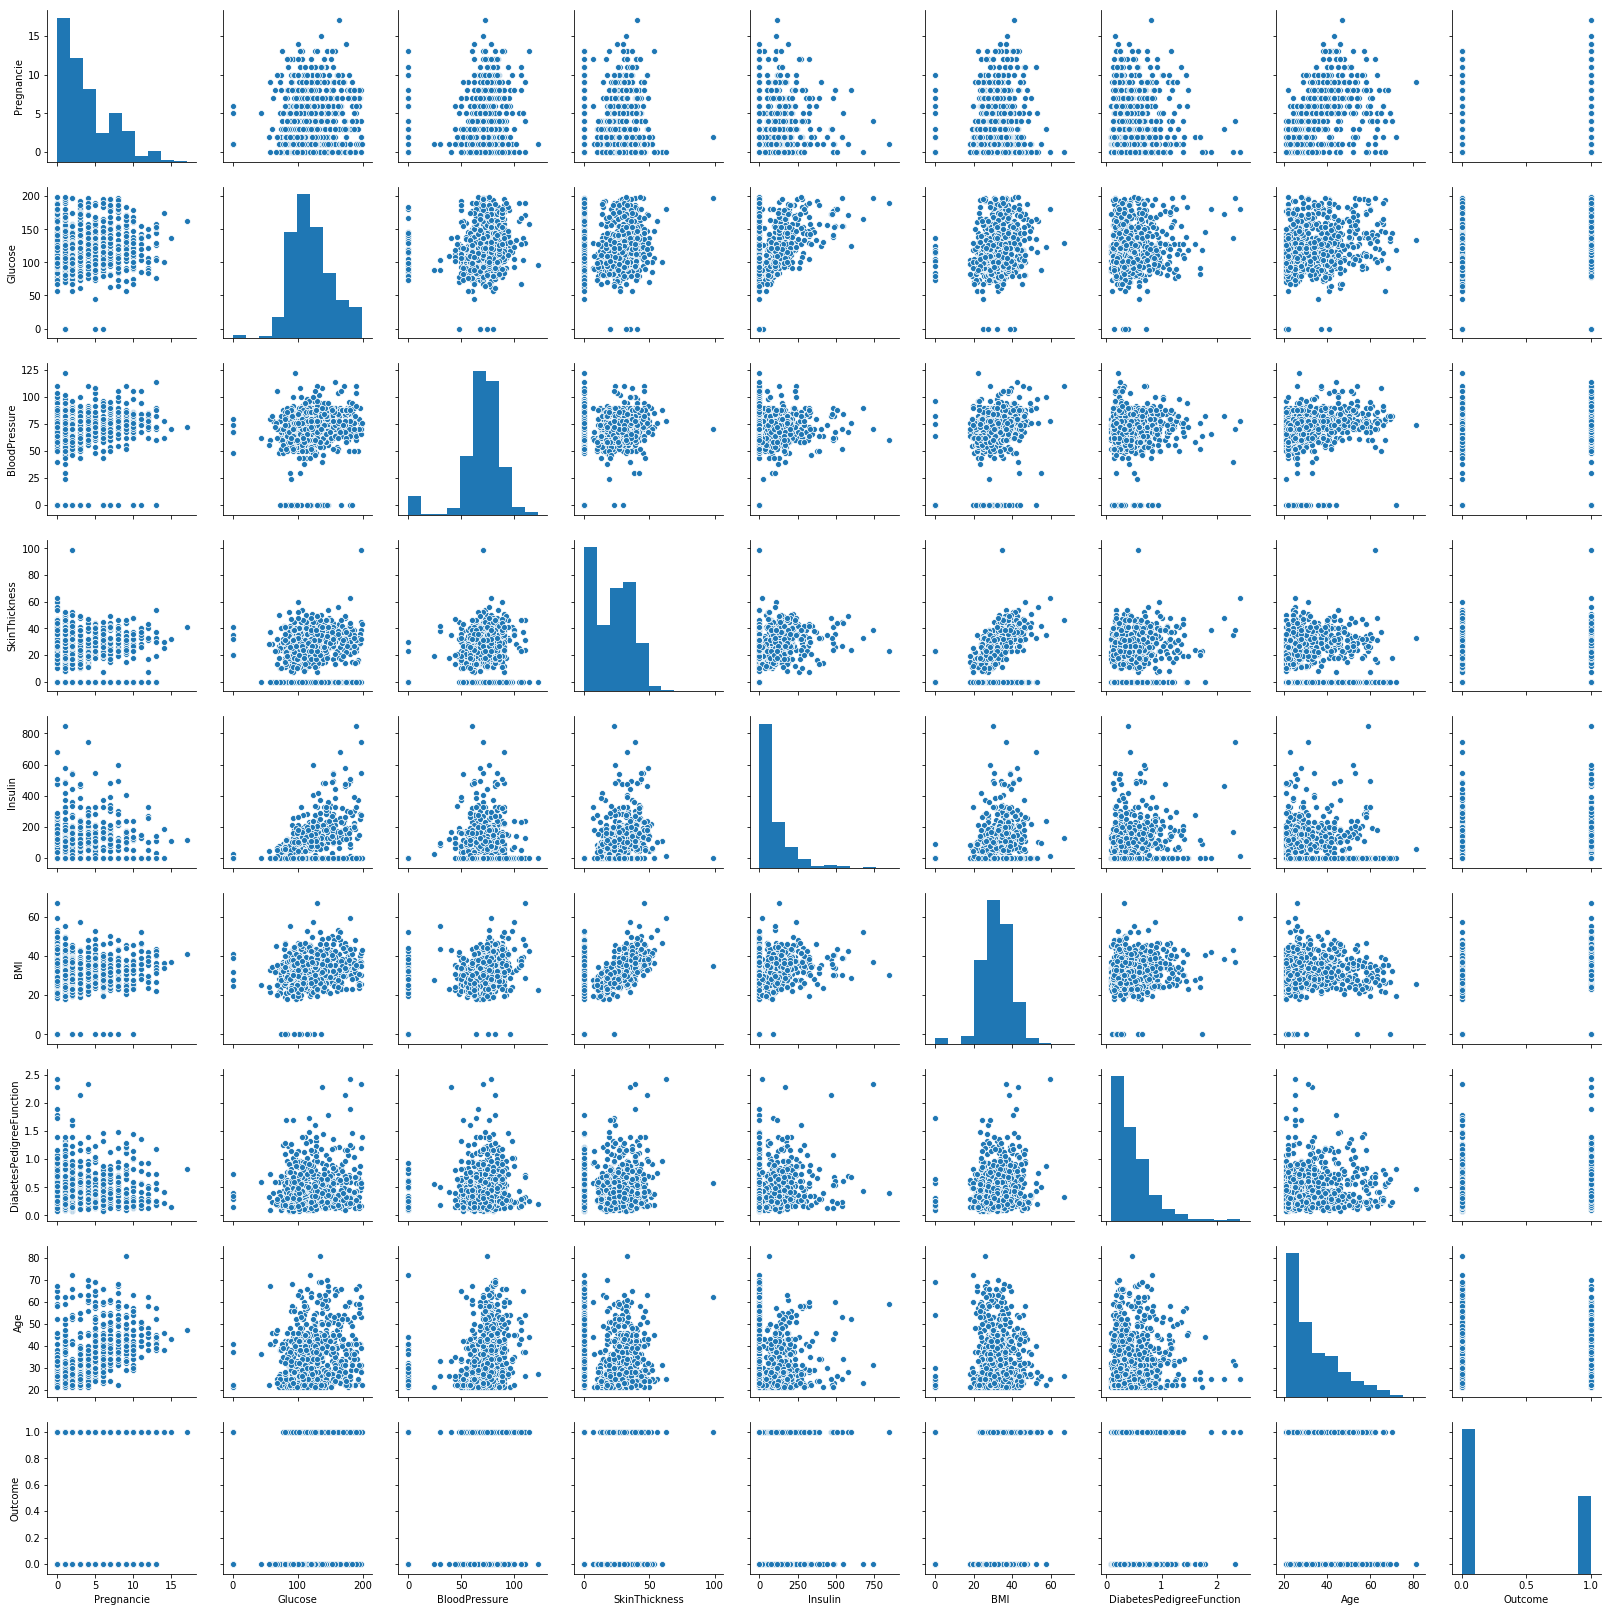

In [ ]:
ax = sns.pairplot(dataset)

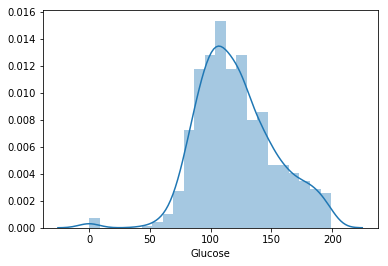

In [ ]:
ax1 = sns.distplot(dataset['Glucose'])

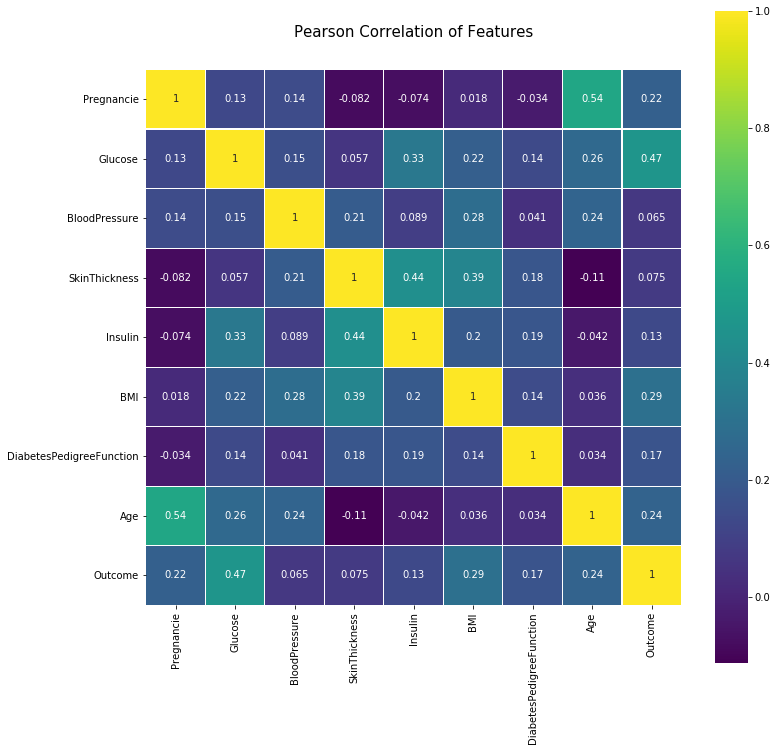

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

colormap=plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size =15)
sns.heatmap(dataset.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap,linecolor='white', annot=True)

In [ ]:
#dataset= pd.read_csv('C:/Users/SHIV/Downloads/pima-indians-diabetes.csv')
#split data into X and Y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]
#split data into train and test sets
seed=7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=test_size, random_state= seed)

In [ ]:
#fit model on training data
param_grid={
    'learning_rate' : [0.1,0.2,0.5],
    'max_depth' : [3,5,8],
    'n_estimators':[10,50,100,200]
}
xgb=XGBClassifier()
model =  GridSearchCV(estimator=xgb, param_grid = param_grid, cv=3)
model.fit(X_train, y_train)
print(model.best_params_)


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
best_grid = model.best_estimator_
xgboost = best_grid.fit(X_train, y_train)
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
#make predictions for test data
y_pred = xgboost.predict(X_test)
#predictions = [round(value)for value in y_pred]
#evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:%.2f%%"%(accuracy*100.0))

Accuracy:77.95%


In [ ]:
y_pred_prob = best_grid.predict_proba(X_test)#we can change probability(prob. cutoff) for accuracy
y_pred_prob
#checking probablities 0 1 # assgnment precision recall and change in prob cutoff

array([[0.9545844 , 0.04541559],
       [0.05245447, 0.9475455 ],
       [0.41897488, 0.5810251 ],
       [0.9831998 , 0.0168002 ],
       [0.4119159 , 0.5880841 ],
       [0.31113452, 0.6888655 ],
       [0.9705527 , 0.02944732],
       [0.93274003, 0.06725994],
       [0.11494881, 0.8850512 ],
       [0.6501156 , 0.34988442],
       [0.03848034, 0.96151966],
       [0.99019825, 0.00980172],
       [0.07478714, 0.92521286],
       [0.0899508 , 0.9100492 ],
       [0.8759558 , 0.12404419],
       [0.8833156 , 0.11668438],
       [0.7805242 , 0.21947582],
       [0.35131902, 0.648681  ],
       [0.98205894, 0.01794105],
       [0.7698676 , 0.23013239],
       [0.6992918 , 0.30070814],
       [0.79318744, 0.20681255],
       [0.3731498 , 0.6268502 ],
       [0.23303777, 0.76696223],
       [0.9244116 , 0.07558843],
       [0.93374586, 0.06625411],
       [0.9396339 , 0.06036608],
       [0.5944243 , 0.4055757 ],
       [0.5389885 , 0.46101153],
       [0.4979669 , 0.5020331 ],
       [0.

In [ ]:
model.cv_results_

C:\Users\SHIV\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SHIV\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SHIV\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SHIV\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([0.11198505, 0.03058155, 0.05286463, 0.09990795, 0.01231408,
        0.04187616, 0.07022397, 0.14052137, 0.02604763, 0.06968093,
        0.13568242, 0.18584681, 0.00797868, 0.0313859 , 0.04634889,
        0.10913539, 0.0156219 , 0.04165657, 0.08094939, 0.15123852,
        0.01697493, 0.05981787, 0.10841354, 0.15015244, 0.00520714,
        0.03124229, 0.0551037 , 0.09994642, 0.        , 0.04221185,
        0.08200375, 0.10817337, 0.02084152, 0.06247218, 0.06872574,
        0.12925577]),
 'std_fit_time': array([1.43569625e-01, 2.35190655e-03, 5.33066285e-03, 8.76042843e-03,
        1.89745114e-03, 1.64214288e-03, 5.53132999e-03, 1.91848101e-02,
        7.37480923e-03, 1.01727320e-02, 6.52557335e-03, 1.45693291e-02,
        3.37174788e-07, 3.93353854e-03, 3.56466807e-03, 1.27554072e-02,
        8.92080638e-07, 7.36378502e-03, 1.30640245e-02, 9.54317538e-04,
        2.15854060e-03, 8.28925441e-04, 1.17130797e-02, 1.53707816e-02,
        7.36400976e-03, 2.51282576e-0

In [ ]:
y_test

353    0
236    1
323    1
98     0
701    1
61     1
600    0
242    1
744    0
644    0
300    1
543    0
549    0
235    1
582    0
620    0
751    0
202    0
713    0
140    0
608    0
700    0
53     1
13     1
572    0
142    0
277    0
756    0
296    1
613    0
      ..
757    1
660    0
188    1
351    0
120    1
108    0
616    0
590    1
692    0
492    0
205    0
709    1
3      0
58     0
223    0
101    0
746    1
221    1
471    0
564    0
209    1
52     0
17     1
229    0
299    0
146    0
50     0
699    0
155    1
612    1
Name: Outcome, Length: 254, dtype: int64